<a href="https://colab.research.google.com/github/sunnywood0906/Programming-Language/blob/main/AI-Fitness-Assistant-Advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
apikey = userdata.get('test')

In [2]:
#確認python的版本
!python --version

Python 3.11.11


In [15]:
!pip uninstall -y pandas
!pip install pandas==2.2.2
!pip install --upgrade gspread


Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)


In [4]:
#安裝Gemini API套件
!pip install google-generativeai

In [5]:
import gspread
from google.colab import auth
from google.auth import default

# 驗證 Google Drive 權限
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# 設定 Google Sheet 名稱
spreadsheet_name = "AI運動助理回覆"
try:
    sh = gc.open(spreadsheet_name)  # 如果已存在則打開
except gspread.exceptions.SpreadsheetNotFound:
    sh = gc.create(spreadsheet_name)  # 如果不存在則創建
    sh.share('linda45205341@gmail.com', perm_type='user', role='writer')  # 設定共享權限
# 選擇工作表（如果不存在則建立）
try:
    worksheet = sh.worksheet("回應記錄")
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title="回應記錄", rows="100", cols="5")

In [6]:
import google.generativeai as genai

# 設定API Key

genai.configure(api_key = apikey)

# 測試 API 是否正常
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("請簡單介紹自己")
print(response.text)

我是一個大型語言模型，由 Google 訓練。



In [7]:
#set
def get_fitness_plan(age, gender, height, weight, goal1, goal2, activity_level):
    """
    根據使用者的體重、目標和運動習慣，產生運動與飲食建議
    """
    prompt = f"""
    你是一個專業健身教練，請根據以下資訊提供運動與飲食建議：
    - 日期：{date} (YYYY/MM/DD)
    - 年齡：{age} 歲
    - 生理性別：{gender}（男 / 女 / 不透露）
    - 體重：{weight} 公斤
    - 身高：{height} 公分
    - 第一階段目標：{goal1}（減脂 / 增肌 / 維持）
    - 第二階段目標：{goal2}（減脂 / 增肌 / 維持 / 無）
    - 運動頻率：{activity_level}（低 / 中 / 高）

    **請提供：**
    1. BMI(包含範圍說明)
    2. 基礎代謝率BMR(向使用者簡要介紹甚麼是BMR)
    3. 總熱量消耗TDEE(向使用者簡要介紹甚麼是TDEE)
    4. 每日建議攝取熱量（大約數字）
    5. 每週運動建議（以一周為使用者規劃運動計畫）
    6. 任何適合的飲食建議(根據目標與TDEE設定)
    """#f-string:可以直接在字串中插入變數而不用+拼接字串

    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    return response.text


In [60]:
#input\
\
date = input("請輸入今天的日期(YYYY/MM/DD)")
age = int(input("請輸入你的年齡（歲）："))
gender = input("請輸入你的生理性別（男 / 女 / 不透露）：")
height = float(input("請輸入你的身高（cm）："))
weight = float(input("請輸入你的體重（kg）："))
goal1 = input("你的第一階段目標是（減脂 / 增肌 / 維持）：")
goal2 = input("你的第二階段目標是（減脂 / 增肌 / 維持 / 無）：")
activity_level = input("你的運動頻率（低 / 中 / 高）：")

# 取得 AI 建議
fitness_plan = get_fitness_plan(age, gender, height, weight, goal1, goal2, activity_level)

# 顯示結果
print("\n💪 AI 健康建議 💪")
print(fitness_plan)

請輸入今天的日期(YYYY/MM/DD)2025/4/30
請輸入你的年齡（歲）：20
請輸入你的生理性別（男 / 女 / 不透露）：女
請輸入你的身高（cm）：168
請輸入你的體重（kg）：65
你的第一階段目標是（減脂 / 增肌 / 維持）：減脂
你的第二階段目標是（減脂 / 增肌 / 維持 / 無）：增肌
你的運動頻率（低 / 中 / 高）：中

💪 AI 健康建議 💪
您好！很高興能為您制定健身與飲食計劃。根據您提供的資訊，我們將制定一個循序漸進的計劃，幫助您先減脂再增肌。

**1. BMI (身體質量指數)**

* 計算方式：體重(公斤) / 身高(公尺)²
* BMI = 65 / (1.68)² ≈ 23.0
* 範圍說明：您的BMI落在20-25之間，屬於正常範圍。

**2. 基礎代謝率 (BMR)**

BMR是指身體在完全靜止狀態下，維持基本生命機能所需的最低能量消耗。我們可以使用Mifflin-St Jeor 公式估算您的BMR:

* 女性：BMR = (10 x 體重(公斤)) + (6.25 x 身高(公分)) - (5 x 年齡) - 161
* BMR = (10 x 65) + (6.25 x 168) - (5 x 20) - 161 ≈ 1422 kcal

這代表您每天即使什麼都不做，也需要消耗大約1422卡路里來維持生命機能。


**3. 總熱量消耗 (TDEE)**

TDEE是指您在一天中所有活動（包括基礎代謝率、運動、日常活動等）所消耗的總熱量。  我們根據您的運動頻率（中）估算您的活動水平乘數約為1.55。

* TDEE = BMR x 活動水平乘數
* TDEE = 1422 x 1.55 ≈ 2204 kcal

這代表您每天大約消耗2204卡路里。


**4. 每日建議攝取熱量**

第一階段目標是減脂，建議您將每日攝取熱量控制在TDEE以下，但不要過度限制，以免影響新陳代謝。  建議您每天攝取約1800-1900卡路里。  這個數字只是估計值，實際情況需要根據您的進度調整。


**5. 每週運動建議**

（此計畫著重於結合有氧和肌力訓練，以達到減脂和日後增肌的目標）


**週一：**  有氧運動 (30-45分鐘，例如：慢跑、游泳、自行車)，核心肌群訓練 (20分鐘，例如：平板支撐、卷腹、

In [63]:
# 如果有舊數據，轉換為 DataFrame，否則建立一個空的 DataFrame
if len(existing_data) > 1:  # 確保有標題列
    df_existing = pd.DataFrame(existing_data[1:], columns=existing_data[0])  # 讀取舊數據
else:
    df_existing = pd.DataFrame(columns=["日期", "年齡", "性別", "身高(cm)", "體重(kg)",
                                        "第一階段目標", "第二階段目標", "運動頻率", "AI 健康建議"])
# 建立新數據的 DataFrame
df_new = pd.DataFrame(data)

# 合併新數據 & 舊數據（確保累積，不覆蓋）
df_combined = pd.concat([df_existing, df_new], ignore_index=True)
worksheet.update([df_combined.columns.values.tolist()] + df_combined.values.tolist())

print("✅ AI 回覆內容已成功寫入 Google Sheet！🚀")

✅ AI 回覆內容已成功寫入 Google Sheet！🚀


In [64]:
import pandas as pd

# 建立 DataFrame，將用戶輸入 & AI 建議存入
data = {
    "日期": [date],
    "年齡": [age],
    "性別": [gender],
    "身高(cm)": [height],
    "體重(kg)": [weight],
    "第一階段目標": [goal1],
    "第二階段目標": [goal2],
    "運動頻率": [activity_level],
    "AI 健康建議": [fitness_plan]
}

# 讀取 Google Sheet 內的現有數據
existing_data = worksheet.get_all_values()

# 🔍 測試 Google Sheet 是否成功讀取
print("🔍 讀取到的 Google Sheet 數據：")
for row in existing_data:
    print(row)




🔍 讀取到的 Google Sheet 數據：
['日期', '年齡', '性別', '身高(cm)', '體重(kg)', '第一階段目標', '第二階段目標', '運動頻率', 'AI 健康建議']
['2025/03/24', '20', '女', '168', '78', '減脂', '增肌', '中', '您好！很高興能為您制定健身計劃。根據您提供的資訊，我們可以開始規劃您的減脂和增肌旅程。\n\n**1. BMI (身體質量指數):**\n\n您的BMI = 體重(公斤) / 身高(公尺)² = 78 / (1.68)² ≈ 27.6\n\n* **BMI範圍說明:**  18.5-24.9 為正常體重；25.0-29.9 為過重；30.0 以上為肥胖。您的BMI屬於過重範圍，減脂是必要的。\n\n\n**2. 基礎代謝率 (BMR):**\n\nBMR是指身體在完全靜止狀態下，維持基本生命活動所需的能量消耗。我們使用 Mifflin-St Jeor 公式來估算您的BMR：\n\n女性：BMR = (10 × 體重(公斤)) + (6.25 × 身高(公分)) - (5 × 年齡) - 161\n\n您的BMR ≈ (10 × 78) + (6.25 × 168) - (5 × 20) - 161 ≈ 1477  卡路里\n\n**簡要介紹:** BMR是您每天消耗能量的基礎，即使您什麼都不做，身體也需要這些能量來維持心跳、呼吸等基本功能。\n\n\n**3. 總熱量消耗 (TDEE):**\n\nTDEE是指您一天中總共消耗的卡路里，包含BMR以及活動量所消耗的卡路里。您的運動頻率為中，我們假設您的活動因子為1.55 (中等活動量)。\n\n您的TDEE ≈ BMR × 活動因子 = 1477 × 1.55 ≈ 2288 卡路里\n\n**簡要介紹:** TDEE比BMR更能反映您實際的每日能量消耗，它考慮了您的活動量。\n\n\n**4. 每日建議攝取熱量:**\n\n您的第一階段目標是減脂，建議您將每日攝取熱量控制在TDEE以下，但不要過低，以免影響新陳代謝。建議每日攝取熱量約為 **1800-1900 卡路里**。  這個數字是估計值，實際情況可能因個人差異而異。  您可以透過追蹤您的進度來調整攝取熱量。\n\n\n**5. 每週運動建議:**\

In [65]:
# 重新從 Google Sheet 抓資料並定義 df_read
data = worksheet.get_all_values()

if len(data) > 1:
    df_read = pd.DataFrame(data[1:], columns=data[0])  # 把第一列當欄位名稱
else:
    df_read = pd.DataFrame(columns=["日期", "年齡", "性別", "身高(cm)", "體重(kg)",
                                    "第一階段目標", "第二階段目標", "運動頻率", "AI 健康建議"])

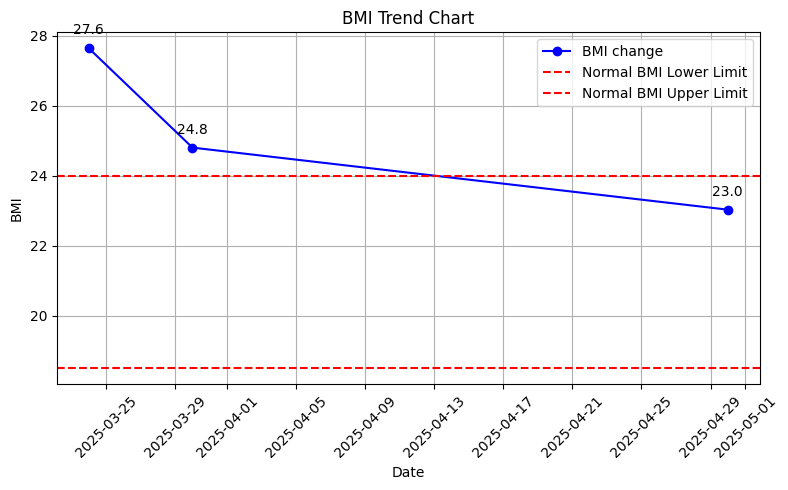

In [66]:
import matplotlib.pyplot as plt

df_read["身高(cm)"] = df_read["身高(cm)"].astype(float)
df_read["體重(kg)"] = df_read["體重(kg)"].astype(float)
df_read["BMI"] = df_read["體重(kg)"] / ((df_read["身高(cm)"] / 100) ** 2)

# 日期轉型與排序
df_read["日期"] = pd.to_datetime(df_read["日期"])
df_read = df_read.sort_values(by="日期")

# 繪製 BMI 變化圖，加入 X 軸與 Y 軸標籤說明
plt.figure(figsize=(8, 5))
plt.plot(df_read["日期"], df_read["BMI"], marker="o", linestyle="-", color="b", label="BMI change")

# 標記每個點的 BMI 數值
for i, txt in enumerate(df_read["BMI"]):
    plt.annotate(f"{txt:.1f}", (df_read["日期"].iloc[i], df_read["BMI"].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')
# 加入正常 BMI 區間線
plt.axhline(y=18.5, color="red", linestyle="--", label="Normal BMI Lower Limit")
plt.axhline(y=24.0, color="red", linestyle="--", label="Normal BMI Upper Limit")

# 加入軸標籤與圖表標題
plt.xlabel("Date")
plt.ylabel("BMI")
plt.title("BMI Trend Chart")

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
def delete_last_entry():
    # 取得 Google Sheet 目前的所有數據
    data = worksheet.get_all_values()

    # 確保資料不是空的，且有標題+數據
    if len(data) > 1:
        last_row = len(data)  # 最後一行的索引
        worksheet.delete_rows(last_row)  # 刪除最後一行
        print("✅ 最新的一筆資料已被刪除！")
    else:
        print("⚠️ 沒有數據可刪除！")

# 執行刪除當前最新數據
delete_last_entry()

✅ 最新的一筆資料已被刪除！


In [72]:
# 要更新資料必須重新執行:重新從 Google Sheet 抓資料並定義 df_read
from IPython.display import display

display(df_read)

,日期,年齡,性別,身高(cm),體重(kg),第一階段目標,第二階段目標,運動頻率,AI 健康建議,BMI
0,2025-03-24,20,女,168.0,78.0,減脂,增肌,中,您好！很高興能為您制定健身計劃。根據您提供的資訊，我們可以開始規劃您的減脂和增肌旅程。\n\...,27.636054
1,2025-03-30,20,女,168.0,70.0,減脂,增肌,中,您好！很高興能為您制定健身和飲食計畫。根據您提供的資訊，我們可以開始規劃：\n\n**1. ...,24.801587
2,2025-04-30,20,女,168.0,65.0,減脂,增肌,中,您好！很高興能為您制定健身與飲食計劃。根據您提供的資訊，我們將制定一個循序漸進的計劃，幫助您...,23.030045


In [77]:
def get_bmi_trend_advice(df_read):
    """
    根據 df_read 中的 BMI 趨勢資料，請 Gemini 提供分析與建議
    """
    import google.generativeai as genai
    model = genai.GenerativeModel("gemini-1.5-flash")

    # 生成 BMI 變化摘要
    trend_text = "這是我的 BMI 變化紀錄：\n"
    for i in range(len(df_read)):
        date = df_read["日期"].iloc[i]
        bmi = df_read["BMI"].iloc[i]
        trend_text += f"{date.date()}: BMI {bmi:.1f}\n"

    # 建立 prompt
    prompt = f"""
    你是一位專業健身與營養顧問，請根據下列使用者的 BMI 變化趨勢提供分析與建議。
    {trend_text}

    請針對以下面向給出條列式建議：
    1. 使用者的整體趨勢判斷（BMI 增減方向是否健康）
    2. 是否建議調整目前飲食或運動方式
    3. 如果需要，請提供調整方向與具體做法
    4. 建議使用者下一步的健身目標與注意事項
    """

    response = model.generate_content(prompt)
    return response.text

advice = get_bmi_trend_advice(df_read)
print(advice)

根據您提供的 BMI 數據 (2025-03-24: 27.6, 2025-03-30: 24.8, 2025-04-30: 23.0)，顯示您在短短一個多月內減重速度非常快。

**1. 使用者的整體趨勢判斷（BMI 增減方向是否健康）**

* 趨勢：您的 BMI 從超重 (25-29.9) 快速下降至正常範圍 (18.5-24.9)。表面上看來，減重方向是健康的。

* 健康考量：然而，如此快速的減重速度可能存在健康隱患。  這可能意味著您採取了過於極端的節食或高強度運動，容易導致營養不良、肌肉流失、新陳代謝減慢，甚至出現健康問題，例如電解質失衡、心律不齊等。  健康的減重速度一般建議為每週0.5-1公斤。

**2. 是否建議調整目前飲食或運動方式**

是的，強烈建議調整目前飲食和運動方式。  目前的減重速度過快，不可持續，且潛藏健康風險。


**3. 如果需要，請提供調整方向與具體做法**

* **飲食調整：**
    * **避免極端節食：**  停止任何極端節食方法，例如斷食或只吃單一食物。
    * **均衡飲食：**  確保攝取足夠的蛋白質、碳水化合物和健康脂肪。  蛋白質有助於維持肌肉量，碳水化合物提供能量，健康脂肪則對身體機能運作至關重要。  多攝取蔬菜水果，提供豐富的維生素和礦物質。
    * **計算卡路里：**  了解您的基礎代謝率 (BMR) 和每日活動消耗量，計算出合理的卡路里攝取目標。  建議尋求專業營養師的協助，制定個人化的飲食計畫。  不要過度限制卡路里，以免影響新陳代謝和健康。
    * **少量多餐：**  將一日三餐調整為少量多餐，有助於控制血糖和飢餓感。
    * **控制加工食品、含糖飲料和高飽和脂肪食物的攝入。**

* **運動調整：**
    * **避免過度訓練：**  給予身體充足的休息時間，避免造成運動傷害和過度疲勞。
    * **多樣化運動：**  結合不同類型的運動，例如有氧運動 (例如慢跑、游泳、騎自行車) 和肌力訓練 (例如重量訓練)。  肌力訓練有助於提升代謝率和維持肌肉量。
    * **循序漸進：**  逐步增加運動強度和時間，避免一下子負荷過重。
    * **聆聽身體的反應：**  如果感到身體不適，應立即停止運動，並尋求專業人士的協助。


**4. 建議使用者